ΕΡΓΑΣΙΑ 2
 
Χρήστος Καρούσης 1115201900078
 
Θανάσης Κοτσομπόλης 1115201900090

### Task 1 - Preprocessing

Import libraries

In [1]:
import pandas as pd

Create the dataframe

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/books_1.Best_Books_Ever.csv', delimiter = ',')

Helper function to remove ' '

In [3]:
def unquote_list(string):
  string = string.strip("[]")
  string_list = string.split(", ")

  list_data = [element.strip("'") for element in string_list]
  return list_data

In [4]:
df.head()

,bookId,title,series,author,rating,description,language,isbn,genres,characters,...,firstPublishDate,awards,numRatings,ratingsByStars,likedPercent,setting,coverImg,bbeScore,bbeVotes,price
0,2767052-the-hunger-games,The Hunger Games,The Hunger Games #1,Suzanne Collins,4.33,WINNING MEANS FAME AND FORTUNE.LOSING MEANS CE...,English,9780439023481,"['Young Adult', 'Fiction', 'Dystopia', 'Fantas...","['Katniss Everdeen', 'Peeta Mellark', 'Cato (H...",...,NaN,['Locus Award Nominee for Best Young Adult Boo...,6376780,"['3444695', '1921313', '745221', '171994', '93...",96.0,"['District 12, Panem', 'Capitol, Panem', 'Pane...",https://i.gr-assets.com/images/S/compressed.ph...,2993816,30516,5.09
1,2.Harry_Potter_and_the_Order_of_the_Phoenix,Harry Potter and the Order of the Phoenix,Harry Potter #5,"J.K. Rowling, Mary GrandPré (Illustrator)",4.50,There is a door at the end of a silent corrido...,English,9780439358071,"['Fantasy', 'Young Adult', 'Fiction', 'Magic',...","['Sirius Black', 'Draco Malfoy', 'Ron Weasley'...",...,06/21/03,['Bram Stoker Award for Works for Young Reader...,2507623,"['1593642', '637516', '222366', '39573', '14526']",98.0,['Hogwarts School of Witchcraft and Wizardry (...,https://i.gr-assets.com/images/S/compressed.ph...,2632233,26923,7.38
2,2657.To_Kill_a_Mockingbird,To Kill a Mockingbird,To Kill a Mockingbird,Harper Lee,4.28,The unforgettable novel of a childhood in a sl...,English,9999999999999,"['Classics', 'Fiction', 'Historical Fiction', ...","['Scout Finch', 'Atticus Finch', 'Jem Finch', ...",...,07/11/60,"['Pulitzer Prize for Fiction (1961)', 'Audie A...",4501075,"['2363896', '1333153', '573280', '149952', '80...",95.0,"['Maycomb, Alabama (United States)']",https://i.gr-assets.com/images/S/compressed.ph...,2269402,23328,NaN
3,1885.Pride_and_Prejudice,Pride and Prejudice,NaN,"Jane Austen, Anna Quindlen (Introduction)",4.26,Alternate cover edition of ISBN 9780679783268S...,English,9999999999999,"['Classics', 'Fiction', 'Romance', 'Historical...","['Mr. Bennet', 'Mrs. Bennet', 'Jane Bennet', '...",...,01/28/13,[],2998241,"['1617567', '816659', '373311', '113934', '767...",94.0,"['United Kingdom', 'Derbyshire, England (Unite...",https://i.gr-assets.com/images/S/compressed.ph...,1983116,20452,NaN
4,41865.Twilight,Twilight,The Twilight Saga #1,Stephenie Meyer,3.60,About three things I was absolutely positive.\...,English,9780316015844,"['Young Adult', 'Fantasy', 'Romance', 'Vampire...","['Edward Cullen', 'Jacob Black', 'Laurent', 'R...",...,10/05/05,"['Georgia Peach Book Award (2007)', 'Buxtehude...",4964519,"['1751460', '1113682', '1008686', '542017', '5...",78.0,"['Forks, Washington (United States)', 'Phoenix...",https://i.gr-assets.com/images/S/compressed.ph...,1459448,14874,2.1


In the beginning we remove the NaN rows from some selected columns, so we dont get a very small dataset

In [5]:
df = df.dropna(subset=['ratingsByStars', 'genres', 'publishDate', 'pages'])

In [6]:
df['ratingsByStars'] = df['ratingsByStars'].apply(unquote_list)
df['genres'] = df['genres'].apply(unquote_list)

<ipython-input-6-94113a019046>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ratingsByStars'] = df['ratingsByStars'].apply(unquote_list)


Split the column ratingByStars in 5 distinct columns

In [7]:
df[['ratingStar5', 'ratingStar4', 'ratingStar3', 'ratingStar2', 'ratingStar1']] = pd.DataFrame(df['ratingsByStars'].tolist())

Get the first genre from the list in genres column

In [8]:
df['genreSingle'] = [genre[0] for genre in df['genres']]

Using to_datetime to get the year that the book was published (there were some mistakes in the data so we had to ignore mistakes and set them NaN value)

In [9]:
df['publishYear'] = pd.to_datetime(df['publishDate'], errors='coerce').dt.year 
# we need errors='coerce' because there are some errors in the data for example publishDate=Published

### Task 2

Histogram of ratings

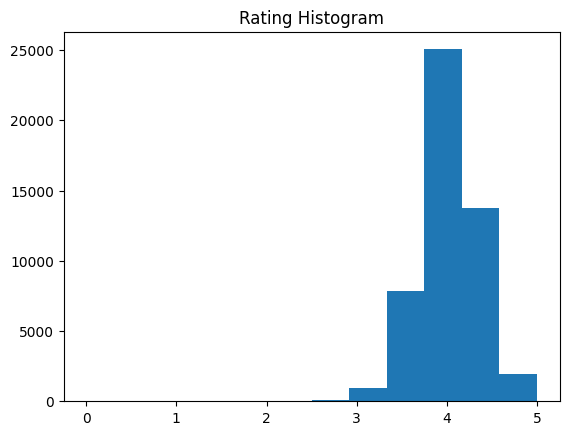

In [10]:
import matplotlib.pyplot as plt
plt.hist(df['rating'], bins=12)
plt.title('Rating Histogram')
plt.show()

Top 10 books with most pages

In [11]:
df['pages'] = pd.to_numeric(df['pages'], errors='coerce') ## need to handle errors
topBooks = df.nlargest(10, 'pages')
print(topBooks['title'])

11490                         The Story of Civilization
22960                        The Complete Wheel of Time
8374            The Complete Malazan Book of the Fallen
5098                                          Animorphs
20098                                         Homestuck
3148                                               Worm
23326                               سه تفنگدار: ١٠ جلدی
4692     The Complete Aubrey/Maturin Novels (5 Volumes)
14269                                  البداية والنهاية
1679                             A Song of Ice and Fire
Name: title, dtype: object


Print top 10 authors with most books

In [12]:
topAuthors = df['author'].value_counts().nlargest(10)
print(topAuthors)

Nora Roberts (Goodreads Author)       82
Agatha Christie                       71
Stephen King (Goodreads Author)       64
Erin Hunter                           55
Bella Forrest (Goodreads Author)      52
Meg Cabot (Goodreads Author)          51
Karen Kingsbury (Goodreads Author)    48
Terry Pratchett                       48
Bonnie Bryant                         46
Enid Blyton                           43
Name: author, dtype: int64


Print top 10 authors with most ratings

In [13]:
author_ratings = df.groupby('author')['numRatings'].sum()
topAuthorsRatings = author_ratings.nlargest(10)
print(topAuthorsRatings)

author
J.K. Rowling, Mary GrandPré (Illustrator)    17790643
Suzanne Collins                              11648826
Stephenie Meyer                              10709044
Stephen King (Goodreads Author)              10258580
Rick Riordan (Goodreads Author)               8132198
Dan Brown (Goodreads Author)                  7014203
J.R.R. Tolkien                                6621046
J.K. Rowling                                  6462880
John Green (Goodreads Author)                 6347598
Cassandra Clare (Goodreads Author)            5637877
Name: numRatings, dtype: int64


Print top 10 languages

In [14]:
topLanguages = df['language'].value_counts().nlargest(10)
print(topLanguages)

English       41106
Arabic          933
Spanish         660
French          556
German          502
Indonesian      356
Portuguese      352
Italian         245
Dutch           209
Turkish         207
Name: language, dtype: int64


Print top 10 publishers

In [20]:
top_publishers = df['publisher'].value_counts().nlargest(10)
print(top_publishers)

Vintage                                        571
HarperCollins                                  551
Penguin Books                                  429
Ballantine Books                               395
Bantam                                         367
Createspace Independent Publishing Platform    361
Avon                                           311
Pocket Books                                   311
Berkley                                        285
Del Rey                                        284
Name: publisher, dtype: int64


Print books by year sorted by values

In [19]:
books_by_year = df['publishYear'].value_counts()
print(books_by_year)

2012.0    3241
2013.0    3203
2011.0    2893
2014.0    2875
2006.0    2584
          ... 
1929.0       1
2063.0       1
2072.0       1
1892.0       1
1906.0       1
Name: publishYear, Length: 124, dtype: int64


### Task 3 - Recommendation System

First we need the books that are written in English

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

df = df.dropna(subset=['description'])

newdf = df[df['language'] == 'English']
newdf.shape

(40685, 32)

We use the TfidfVectorizer to create the unigram and the bigram and we fit_tranform our data. We couldnt use the whole dataset because we had RAM problems, so we dropped the size of the dataset to the half.

In [22]:
newdf = newdf[:20000] # get the half dataframe otherwise we get errors
unigram_vectorizer = TfidfVectorizer(ngram_range=(1, 1), stop_words='english') # unigram 
bigram_vectorizer = TfidfVectorizer(ngram_range=(2, 2), stop_words='english') # bigram
X1 = unigram_vectorizer.fit_transform(newdf['description'])
X2 = bigram_vectorizer.fit_transform(newdf['description'])
unigram_cosine = cosine_similarity(X1)  # find cosine similarity
bigram_cosine = cosine_similarity(X2)  # find cosine similarity

We store the IDs of the most similar books to our book in the dictionaries

In [23]:
unigram_dict = {}
bigram_dict = {}

for i, book_id in enumerate(newdf['bookId']):

  most_similar_indices = unigram_cosine[i].argsort()[::-1] # get the indices of the books sorted in descending order
  most_similar_indices = most_similar_indices[1:] # the most similar book is the same book 
  most_similar_books = newdf['bookId'].iloc[most_similar_indices][:100].tolist() # get he 100 similar IDs
  unigram_dict[book_id] = most_similar_books # store them in the dictionary
  # perform the same operations
  most_similar_indices = bigram_cosine[i].argsort()[::-1]
  most_similar_indices = most_similar_indices[1:]
  most_similar_books = newdf['bookId'].iloc[most_similar_indices][:100].tolist()
  bigram_dict[book_id] = most_similar_books

The recommend function

In [24]:
def recommend(similar_books, item_id, num):
  similar = similar_books.get(item_id) 
  book_title = newdf.loc[newdf['bookId'] == item_id, 'title'].values[0]
  print("Recommending ", num," books similar to: ", book_title)
  print("---------------------------------------------------------")
  for book_id in range(num):
    similar_id = similar[book_id]
    book_title = newdf.loc[newdf['bookId'] == similar_id, 'title'].values[0]
    book_description = newdf.loc[newdf['bookId'] == similar_id, 'description'].values[0]
    print("Recommended: ", book_title)
    print("Description: ", book_description)
    print("\n\n\n")
  return similar[:num]

In [25]:
books = recommend(unigram_dict, '890143.The_Clique', 5)

Recommending  5  books similar to:  The Clique
---------------------------------------------------------
Recommended:  Dial L for Loser
Description:  THE CLIQUE is back...Massie Block: With her glossy brunette bob and Whitestrip smile, Massie is the uncontested ruler of The Clique and the rest of the social scene at Octavian Country Day, an exclusive private school in Westchester County, New York.Claire Lyons: Has finally arrived! But will she be able to stay in Massie's inner circle?Alicia Rivera: Would love to take Massie's throne one day. Just might do it.Dylan Marvil: Massie's second in command, who divides her time between sucking up to Massie and sucking down Atkin's shakes.Kristen Gregory: Will insult you to tears faster than you can say "scholarship kid."THE CLIQUE...The only thing harder than getting in is staying in.




Recommended:  Boys "R" Us
Description:  Massie Block: After disbanding the Pretty Committee, Massie takes charge like Visa, forming OCD's hawtest clique yet:

In [26]:
books = recommend(unigram_dict, '890143.The_Clique', 5)

Recommending  5  books similar to:  The Clique
---------------------------------------------------------
Recommended:  Dial L for Loser
Description:  THE CLIQUE is back...Massie Block: With her glossy brunette bob and Whitestrip smile, Massie is the uncontested ruler of The Clique and the rest of the social scene at Octavian Country Day, an exclusive private school in Westchester County, New York.Claire Lyons: Has finally arrived! But will she be able to stay in Massie's inner circle?Alicia Rivera: Would love to take Massie's throne one day. Just might do it.Dylan Marvil: Massie's second in command, who divides her time between sucking up to Massie and sucking down Atkin's shakes.Kristen Gregory: Will insult you to tears faster than you can say "scholarship kid."THE CLIQUE...The only thing harder than getting in is staying in.




Recommended:  Boys "R" Us
Description:  Massie Block: After disbanding the Pretty Committee, Massie takes charge like Visa, forming OCD's hawtest clique yet:

In [27]:
books = recommend(bigram_dict, '890143.The_Clique', 5)
print(books)


Recommending  5  books similar to:  The Clique
---------------------------------------------------------
Recommended:  Dial L for Loser
Description:  THE CLIQUE is back...Massie Block: With her glossy brunette bob and Whitestrip smile, Massie is the uncontested ruler of The Clique and the rest of the social scene at Octavian Country Day, an exclusive private school in Westchester County, New York.Claire Lyons: Has finally arrived! But will she be able to stay in Massie's inner circle?Alicia Rivera: Would love to take Massie's throne one day. Just might do it.Dylan Marvil: Massie's second in command, who divides her time between sucking up to Massie and sucking down Atkin's shakes.Kristen Gregory: Will insult you to tears faster than you can say "scholarship kid."THE CLIQUE...The only thing harder than getting in is staying in.




Recommended:  Boys "R" Us
Description:  Massie Block: After disbanding the Pretty Committee, Massie takes charge like Visa, forming OCD's hawtest clique yet:

### Task 3 - Classification

In this section we will perform classification

Some cleaning first

In [28]:
df.drop(df[df['genreSingle'] == ''].index, inplace=True)

In [29]:
print(df.shape)

(45335, 32)


We will get the top 10 most frequent categories

In [30]:
genre_values = df['genreSingle'].value_counts(ascending=False)

In [31]:
top_genre_values = genre_values.nlargest(10)

In [32]:
top_genre_values_index = top_genre_values.index

In [33]:
newdf = df[df['genreSingle'].isin(top_genre_values_index)]

In [34]:
print(df.shape)
print(newdf.shape)

(45335, 32)
(27250, 32)


Text Cleaning-We remove punctuation, stopwords and we do all lowercase

In [35]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')
def text_cleaning(text):
  text = text.lower() # lowercase all
  punc = "'-:()[]{}!?$%^&*_~\;/.`+=#@"
  # remove punctuation
  for word in text:
    if word in punc:
        text = text.replace(word, "")
  tokens = word_tokenize(text)
  stop_words = set(stopwords.words("english"))
  tokens = [token for token in tokens if token not in stop_words and token.isalpha()]
  new_text = " ".join(tokens)
  return new_text


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [36]:
newdf['description'] = newdf['description'].apply(text_cleaning)

<ipython-input-36-5d99c5267c12>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdf['description'] = newdf['description'].apply(text_cleaning)


In [37]:
import numpy as np 

We create the embeddings using the code of the lab

In [38]:
#CODE OF LAB TO CREATE EMBEDDINGS
import gensim
from gensim.models import Word2Vec
 
tokenized_description = newdf['description'].apply(lambda x: x.split()) # tokenizing
model_w2v = gensim.models.Word2Vec(
 tokenized_description,
 vector_size=200, # desired no. of features/independent variables
 window=5, # context window size
 min_count=2,
 sg = 1, # 1 for skip-gram model
 hs = 0,
 negative = 10, # for negative sampling
 workers= 2, # no.of cores
 seed = 34)
model_w2v.train(tokenized_description, total_examples= len(newdf['description']), epochs=20)

(43327881, 46263840)

We calculate the mean vector, if no word of this row exists in our embeddings we fill the array with zeros.

In [39]:
def calculate_mean_vector(text, model):
    tokens = word_tokenize(text)
    tokens = [token for token in tokens if token in model.wv]
    if tokens:
        vectors = [model.wv[token] for token in tokens]
        mean_vector = np.mean(vectors, axis=0)
    else:
        mean_vector = np.zeros(model.vector_size)
    return mean_vector

In [40]:
mean_vector = np.array(newdf['description'].apply(lambda x: calculate_mean_vector(x, model_w2v)).tolist())

Save the embeddings in .pkl file

In [41]:
import pickle
model_path = 'word2vec_model.pkl'

with open(model_path, 'wb') as file:
    pickle.dump(model_w2v, file)

In [42]:
model_path = 'word2vec_model.pkl'

with open(model_path, 'rb') as file:
    model_w2v = pickle.load(file)

Use train test split to split our data in train/test

In [43]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(mean_vector, newdf['genreSingle'].values, test_size = 0.2, random_state=0)

We import our classifiers and metrics

In [56]:
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, make_scorer

In [57]:
from sklearn.model_selection import GridSearchCV
nb_classifier = GaussianNB()
svm_classifier = SVC()
rf_classifier = RandomForestClassifier()

We get all scores (accuracy, precision, recall and f1_score). We do cross validate with 10 folds. We couldnt tune more hyperparameters due to time issues. We use refit parameter in GridSearch to be f1 score.

In [61]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
k_folds = KFold(n_splits = 10)
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, average='weighted', zero_division=1),
    'recall': make_scorer(recall_score, average='weighted'),
    'f1_score': make_scorer(f1_score, average='macro')
}
nb_score = cross_validate(nb_classifier, x_train, y_train, cv=k_folds, scoring=scoring)
parameters = {'C': [0.01, 10], 'kernel': ['linear', 'rbf'], 'gamma': [0.01, 10]}
grid_search = GridSearchCV(svm_classifier, parameters, cv=k_folds, scoring=scoring,refit='f1_score')
grid_search.fit(x_train, y_train)
rf_score = cross_validate(rf_classifier, x_train, y_train, cv=k_folds, scoring=scoring)

We print all the scores for each fold (later on we print also the mean scores so we can better see our model's performance)

In [75]:
# Print the scores for Naive Bayes
print("Naive Bayes scores:")
print("\n\n\n")
for metric, scores in nb_score.items():
    if metric.startswith('test_'):
        fold_scores = scores
        for fold, score in enumerate(fold_scores):
            print(f"Fold {fold + 1} - {metric.replace('test_', '')}: {score}")
print("\n\n\n")
# Print the scores for SVM
print("Grid Search cv scores:")
print("\n\n\n")
svm_score = grid_search.cv_results_
for metric, scores in svm_score.items():
    if metric.startswith('split'):
        fold_scores = scores
        for fold, score in enumerate(fold_scores):
          print(f"{metric}: {score}")
print("\n\n\n")
# Print the scores for Random Forest
print("Random Forest scores:")
print("\n\n\n")
for metric, scores in rf_score.items():
    if metric.startswith('test_'):
        fold_scores = scores
        for fold, score in enumerate(fold_scores):
            print(f"Fold {fold + 1} - {metric.replace('test_', '')}: {score}")

Naive Bayes scores:




Fold 1 - accuracy: 0.2963302752293578
Fold 2 - accuracy: 0.286697247706422
Fold 3 - accuracy: 0.29311926605504585
Fold 4 - accuracy: 0.29541284403669726
Fold 5 - accuracy: 0.30045871559633025
Fold 6 - accuracy: 0.2926605504587156
Fold 7 - accuracy: 0.3091743119266055
Fold 8 - accuracy: 0.30458715596330277
Fold 9 - accuracy: 0.2885321100917431
Fold 10 - accuracy: 0.30275229357798167
Fold 1 - precision: 0.45447889583076606
Fold 2 - precision: 0.5053497843065758
Fold 3 - precision: 0.5188094117127959
Fold 4 - precision: 0.4917628437289445
Fold 5 - precision: 0.4816594277293332
Fold 6 - precision: 0.444329445280894
Fold 7 - precision: 0.48253475988352657
Fold 8 - precision: 0.47393339045823607
Fold 9 - precision: 0.4349601702428144
Fold 10 - precision: 0.4495504632080041
Fold 1 - recall: 0.2963302752293578
Fold 2 - recall: 0.286697247706422
Fold 3 - recall: 0.29311926605504585
Fold 4 - recall: 0.29541284403669726
Fold 5 - recall: 0.30045871559633025
Fold 6 - recall:

Mean scores in training

In [80]:
print("Naive Bayes mean scores:")
print("\n\n")
for metric in scoring.keys():
    mean_score = nb_score[f'test_{metric}'].mean()
    print(f"Mean {metric} Score : {mean_score}")
print("\n\n")

print("Grid Search cv mean scores:")
print("\n\n")
results = grid_search.cv_results_
best_index = grid_search.best_index_
for metric in scoring.keys():
    mean_score = results[f'mean_test_{metric}'][best_index]
    print(f"Mean {metric} Score for Best Parameters: {mean_score}")
print("\n\n")

print("Random Forest scores:")
print("\n\n")
for metric in scoring.keys():
    mean_score = rf_score[f'test_{metric}'].mean()
    print(f"Mean {metric} Score : {mean_score}")

Naive Bayes mean scores:



Mean accuracy Score : 0.2969724770642202
Mean precision Score : 0.4737368592381891
Mean recall Score : 0.2969724770642202
Mean f1_score Score : 0.27172350683657076



Grid Search cv mean scores:



Mean accuracy Score for Best Parameters: 0.6605045871559634
Mean precision Score for Best Parameters: 0.6628665622365495
Mean recall Score for Best Parameters: 0.6605045871559634
Mean f1_score Score for Best Parameters: 0.628951849611029



Random Forest scores:



Mean accuracy Score : 0.5921559633027522
Mean precision Score : 0.6332433699810117
Mean recall Score : 0.5921559633027522
Mean f1_score Score : 0.5173294651133358


Calculate mean scores in testing

In [82]:
nb_classifier.fit(x_train, y_train)
nb_test_score = nb_classifier.score(x_test, y_test)
y_predict = nb_classifier.predict(x_test)
nb_test_precision = precision_score(y_test, y_predict, average='weighted')
nb_test_recall = recall_score(y_test, y_predict, average='weighted')
nb_test_f1 = f1_score(y_test, y_predict, average='macro')

best_model = grid_search.best_estimator_
svm_test_score = best_model.score(x_test, y_test)
y_predict = best_model.predict(x_test)
svm_test_precision = precision_score(y_test, y_predict, average='weighted')
svm_test_recall = recall_score(y_test, y_predict, average='weighted')
svm_test_f1 = f1_score(y_test, y_predict, average='macro')

rf_classifier.fit(x_train, y_train)
rf_test_score = rf_classifier.score(x_test, y_test)
y_predict = rf_classifier.predict(x_test)
rf_test_precision = precision_score(y_test, y_predict, average='weighted')
rf_test_recall = recall_score(y_test, y_predict, average='weighted')
rf_test_f1 = f1_score(y_test, y_predict, average='macro')

Mean scores in testing

In [86]:
print(f"Test accuracy for nb {nb_test_score.mean()}")
print(f"Test f1 accuracy for nb {nb_test_f1.mean()}")
print(f"Test precision accuracy for nb {nb_test_precision.mean()}")
print(f"Test recall accuracy for nb {nb_test_recall.mean()}")
print("\n\n")

print(f"Test accuracy for svm {svm_test_score.mean()}")
print(f"Test f1 accuracy for svm {svm_test_f1.mean()}")
print(f"Test precision accuracy for svm {svm_test_precision.mean()}")
print(f"Test recall accuracy for svm {svm_test_recall.mean()}")
print("\n\n")

print(f"Test accuracy for rf {rf_test_score.mean()}")
print(f"Test f1 accuracy for rf {rf_test_f1.mean()}")
print(f"Test precision accuracy for rf {rf_test_precision.mean()}")
print(f"Test recall accuracy for rf {rf_test_recall.mean()}")

Test accuracy for nb 0.29908256880733947
Test f1 accuracy for nb 0.2724400805332576
Test precision accuracy for nb 0.4901870576686238
Test recall accuracy for nb 0.29908256880733947



Test accuracy for svm 0.6660550458715596
Test f1 accuracy for svm 0.6365398484799007
Test precision accuracy for svm 0.6676396751305979
Test recall accuracy for svm 0.6660550458715596



Test accuracy for rf 0.5928440366972477
Test f1 accuracy for rf 0.524813082786901
Test precision accuracy for rf 0.6288179356490389
Test recall accuracy for rf 0.5928440366972477


In [74]:
print(grid_search.best_params_)

{'C': 10, 'gamma': 0.01, 'kernel': 'linear'}


### Task 4 - BONUS

This is the code from the lab with some changes to run properly and load 400 images

In [87]:
import os
import csv
import time
import urllib.request

In [88]:
from google.colab import drive

drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [89]:
#replace it with your path
DIR_PATH = "/content/gdrive/MyDrive/Colab Notebooks/"

In [90]:
def get_books_cover(DIR_PATH, books, bookIds):
        """
        Retrieves books covers to a img/ directory
        Will work on existing books class attribute, so a GoodReads list should be scraped or a books list loaded
        (csv_to_books) before use.
        :return: None
        """
        img_dir = DIR_PATH + "img/"
        check_folder = os.path.isdir(img_dir)

        # If folder doesn't exist, then create it.
        if not check_folder:
            os.makedirs( img_dir)
            print("Creating folder: ", img_dir)

        else:
            print(img_dir, "folder already exists, saving images to folder.")
        
        image_count = 0

        # Download covers
        for (book, bookId) in zip(books, bookIds):            
                urllib.request.urlretrieve(
                     book, img_dir + bookId  + ".jpg"
                )
                image_count = image_count + 1
                # Set a respectful wait time
                time.sleep(2)
                if image_count >= 400:
                  break

In [91]:
import pandas as pd
file = DIR_PATH + "books_1.Best_Books_Ever.csv"

In [92]:

finalbooks = pd.read_csv(file)

In [93]:
finalbooks = finalbooks.dropna(subset=['coverImg'])

In [94]:
finalbooks.head()

,bookId,title,series,author,rating,description,language,isbn,genres,characters,...,firstPublishDate,awards,numRatings,ratingsByStars,likedPercent,setting,coverImg,bbeScore,bbeVotes,price
0,2767052-the-hunger-games,The Hunger Games,The Hunger Games #1,Suzanne Collins,4.33,WINNING MEANS FAME AND FORTUNE.LOSING MEANS CE...,English,9780439023481,"['Young Adult', 'Fiction', 'Dystopia', 'Fantas...","['Katniss Everdeen', 'Peeta Mellark', 'Cato (H...",...,NaN,['Locus Award Nominee for Best Young Adult Boo...,6376780,"['3444695', '1921313', '745221', '171994', '93...",96.0,"['District 12, Panem', 'Capitol, Panem', 'Pane...",https://i.gr-assets.com/images/S/compressed.ph...,2993816,30516,5.09
1,2.Harry_Potter_and_the_Order_of_the_Phoenix,Harry Potter and the Order of the Phoenix,Harry Potter #5,"J.K. Rowling, Mary GrandPré (Illustrator)",4.50,There is a door at the end of a silent corrido...,English,9780439358071,"['Fantasy', 'Young Adult', 'Fiction', 'Magic',...","['Sirius Black', 'Draco Malfoy', 'Ron Weasley'...",...,06/21/03,['Bram Stoker Award for Works for Young Reader...,2507623,"['1593642', '637516', '222366', '39573', '14526']",98.0,['Hogwarts School of Witchcraft and Wizardry (...,https://i.gr-assets.com/images/S/compressed.ph...,2632233,26923,7.38
2,2657.To_Kill_a_Mockingbird,To Kill a Mockingbird,To Kill a Mockingbird,Harper Lee,4.28,The unforgettable novel of a childhood in a sl...,English,9999999999999,"['Classics', 'Fiction', 'Historical Fiction', ...","['Scout Finch', 'Atticus Finch', 'Jem Finch', ...",...,07/11/60,"['Pulitzer Prize for Fiction (1961)', 'Audie A...",4501075,"['2363896', '1333153', '573280', '149952', '80...",95.0,"['Maycomb, Alabama (United States)']",https://i.gr-assets.com/images/S/compressed.ph...,2269402,23328,NaN
3,1885.Pride_and_Prejudice,Pride and Prejudice,NaN,"Jane Austen, Anna Quindlen (Introduction)",4.26,Alternate cover edition of ISBN 9780679783268S...,English,9999999999999,"['Classics', 'Fiction', 'Romance', 'Historical...","['Mr. Bennet', 'Mrs. Bennet', 'Jane Bennet', '...",...,01/28/13,[],2998241,"['1617567', '816659', '373311', '113934', '767...",94.0,"['United Kingdom', 'Derbyshire, England (Unite...",https://i.gr-assets.com/images/S/compressed.ph...,1983116,20452,NaN
4,41865.Twilight,Twilight,The Twilight Saga #1,Stephenie Meyer,3.60,About three things I was absolutely positive.\...,English,9780316015844,"['Young Adult', 'Fantasy', 'Romance', 'Vampire...","['Edward Cullen', 'Jacob Black', 'Laurent', 'R...",...,10/05/05,"['Georgia Peach Book Award (2007)', 'Buxtehude...",4964519,"['1751460', '1113682', '1008686', '542017', '5...",78.0,"['Forks, Washington (United States)', 'Phoenix...",https://i.gr-assets.com/images/S/compressed.ph...,1459448,14874,2.1


In [95]:
images = finalbooks['coverImg']
Ids = finalbooks['bookId']

In [96]:
#finally get the images
get_books_cover(DIR_PATH, images, Ids)

Creating folder:  /content/gdrive/MyDrive/Colab Notebooks/img/


In [97]:
import cv2
import matplotlib.pyplot as plt

Get all the images in a list

In [98]:
dir = DIR_PATH + "img/"
images_ = [os.path.join(dir, img) for img in os.listdir(dir)]

images_list = []

for image in images_:
  img = cv2.imread(image)
  images_list.append(img)

Split the images list in train and test set

In [99]:
from sklearn.model_selection import train_test_split
train_images_list, test_images_list = train_test_split(images_list, test_size=0.05, random_state=0)

In [100]:
print(len(train_images_list))
print(len(test_images_list))

380
20


Calculate every image's histogram and put it in a list so we can later build the dataframe

In [101]:
import numpy as np
colors = ('b','g','r')
histograms_list = []
for image in train_images_list:
  histogram = []
  for i,color in enumerate(colors):
      hist = cv2.calcHist([image],[i],None,[32],[0,256]) # for every image calculate the histogram
      histogram.append(hist)
  combined_histogram = np.concatenate(histogram).flatten()
  histograms_list.append(combined_histogram) # save it in a list

Create the dataframe

In [102]:
df_ = pd.DataFrame(zip(histograms_list), columns=['histograms'])
df_['Ids'] = Ids

In [103]:
print(df_)

                                            histograms  \
0    [31982.0, 25392.0, 23588.0, 11649.0, 8482.0, 7...   
1    [80440.0, 50208.0, 3820.0, 453.0, 349.0, 302.0...   
2    [576.0, 1164.0, 2590.0, 7155.0, 10170.0, 14209...   
3    [2058.0, 1842.0, 2166.0, 2303.0, 2601.0, 2839....   
4    [281.0, 231.0, 287.0, 417.0, 584.0, 1294.0, 27...   
..                                                 ...   
375  [27.0, 65.0, 208.0, 791.0, 2291.0, 2064.0, 144...   
376  [268.0, 332.0, 5704.0, 11584.0, 29173.0, 12742...   
377  [10457.0, 7145.0, 6415.0, 6551.0, 6005.0, 4635...   
378  [29.0, 73.0, 285.0, 1429.0, 12049.0, 32497.0, ...   
379  [8098.0, 10221.0, 11892.0, 11494.0, 9087.0, 79...   

                                              Ids  
0                        2767052-the-hunger-games  
1     2.Harry_Potter_and_the_Order_of_the_Phoenix  
2                      2657.To_Kill_a_Mockingbird  
3                        1885.Pride_and_Prejudice  
4                                  41865.Tw

Get a random image

In [104]:
import random
random_image = random.choice(test_images_list)

Calculate the images histogram

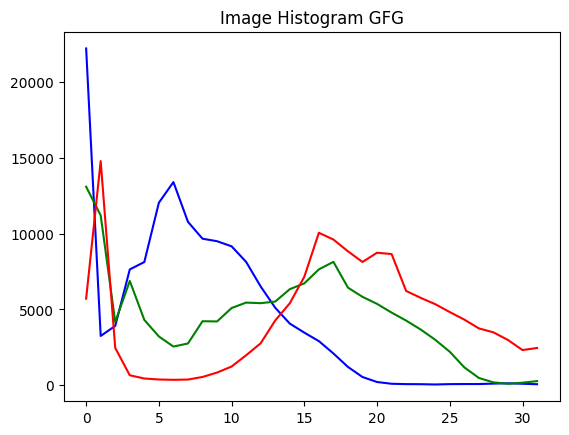

In [105]:
for i,color in enumerate(colors):
      hist = cv2.calcHist([random_image],[i],None,[32],[0,256])
      plt.plot(hist,color = color)
plt.title('Image Histogram GFG')
plt.show()

Calculate cosine similarity for every histogram

In [106]:
histograms = np.array(df_['histograms'].tolist())

reshaped_histograms = histograms.reshape(len(histograms), -1)

cosine = cosine_similarity(reshaped_histograms)

In [107]:
dictionary = {}

for i, book_id in enumerate(df_['Ids']):

  most_similar_indices = cosine[i].argsort()[::-1] # get the indices of the books sorted in descending order
  most_similar_indices = most_similar_indices[1:] # the most similar book is the same book 
  most_similar_books = df_['Ids'].iloc[most_similar_indices][:4].tolist() # get the 4 similar IDs
  dictionary[book_id] = most_similar_books # store them in the dictionary

In [112]:
from PIL import Image
import requests
from io import BytesIO
def recommend(similar_books, item_id):
  similar = similar_books.get(item_id) 
  print(similar)
  print("Print similar images :")
  print("---------------------------------------------------------")
  for book_id in range(4):
    similar_id = similar[book_id]
    book_cover = finalbooks.loc[finalbooks['bookId'] == similar_id, 'coverImg'].values[0]
    response = requests.get(book_cover)
    image = Image.open(BytesIO(response.content))

    image.show()
    print("\n\n\n")
  return similar

['99107.Winnie_the_Pooh', '19543.Where_the_Wild_Things_Are', '7190.The_Three_Musketeers', '24770.Uglies']
Print similar images :
---------------------------------------------------------


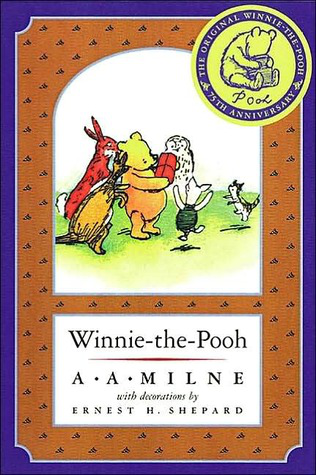

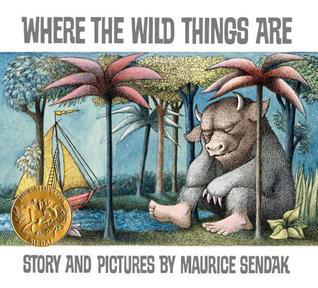

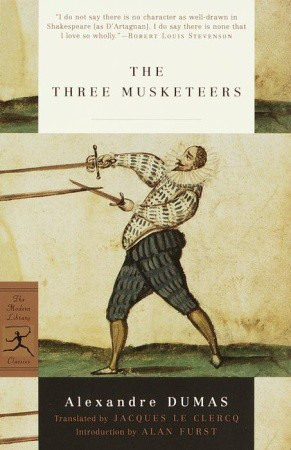

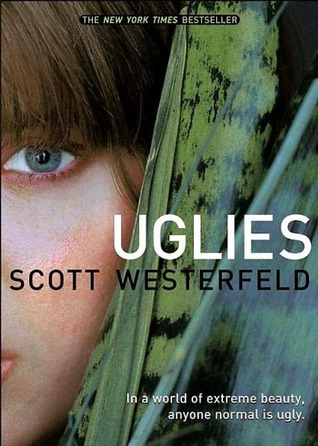

In [113]:
similar_books = recommend(dictionary, '2767052-the-hunger-games')